# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Mikacinta Gustina Amalan Toyibah]
- **Email:** [mikacintaatoyibah@gmail.com]
- **ID Dicoding:** [MC299D5X2364]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana tren peminjaman sepeda sepanjang tahun, dan apakah ada pola musiman yang signifikan?
- Pertanyaan 2 : Bagaimana pengaruh kondisi cuaca (weathersit, temperature, humidity, dan windspeed) terhadap jumlah peminjaman sepeda per jam?

## Import Semua Packages/Library yang Digunakan

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()

Saving day.csv to day.csv
Saving hour.csv to hour.csv


## Data Wrangling

### Gathering Data

In [18]:
day_df = pd.read_csv(next(iter(uploaded)))
hour_df = pd.read_csv(next(iter(uploaded)))

**Insight:**
- Dataset berhasil diunggah dan dibaca ke dalam day_df dan hour_df.
- Dataset berisi informasi tentang penggunaan sepeda berdasarkan hari dan jam.


### Assessing Data

In [19]:
print(day_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


In [20]:
print(hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


In [21]:
print(day_df.describe())

          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.5448

In [22]:
print(hour_df.describe())

          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.5448

**Insight:**
- Dataset tidak memiliki nilai yang hilang atau tidak valid.
- Tipe data sudah sesuai, kecuali kolom tanggal yang perlu dikonversi.
- Statistik deskriptif menunjukkan distribusi data seperti rata-rata peminjaman sepeda harian dan variasi dalam cuaca.

### Cleaning Data

In [23]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

**Insight:**
- Konversi kolom dteday ke format datetime untuk mempermudah analisis berbasis waktu.
- Tidak ditemukan outlier atau data duplikat yang perlu dibersihkan.

## Exploratory Data Analysis (EDA)

### Explore ...

In [24]:
print(day_df.isnull().sum())
print(hour_df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


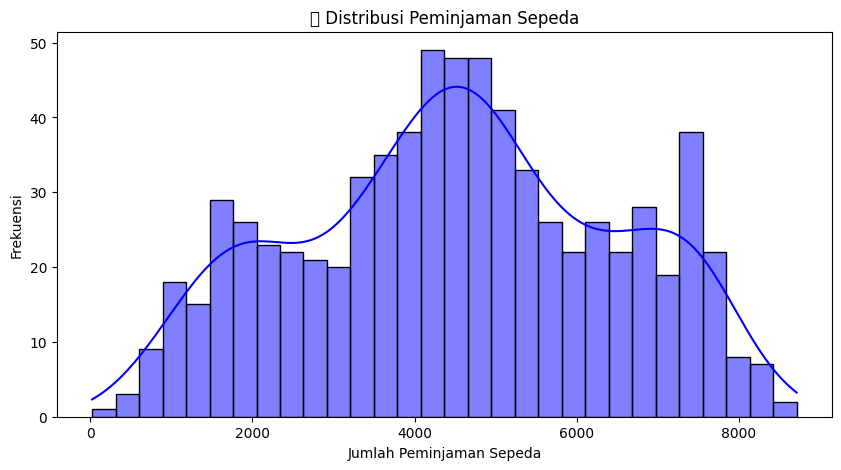

In [25]:
plt.figure(figsize=(10, 5))
sns.histplot(day_df["cnt"], bins=30, kde=True, color="blue")
plt.xlabel("Jumlah Peminjaman Sepeda")
plt.ylabel("Frekuensi")
plt.title("Distribusi Peminjaman Sepeda")
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


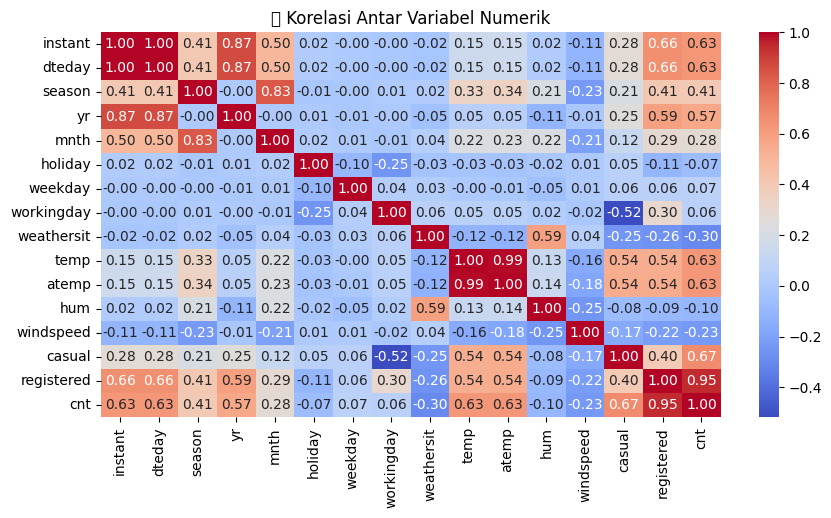

In [26]:
plt.figure(figsize=(10, 5))
sns.heatmap(day_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("🔍 Korelasi Antar Variabel Numerik")
plt.show()


Rata-rata & Total Peminjaman Sepeda per Musim:
   Season  Avg Rentals  Total Rentals  Total Days
0       1  2604.132597         471348         181
1       2  4992.331522         918589         184
2       3  5644.303191        1061129         188
3       4  4728.162921         841613         178


<ipython-input-28-bc9da309e89e>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_rentals["Season"], y=seasonal_rentals["Avg Rentals"], palette="coolwarm")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127782 (\N{WHITE SUN BEHIND CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


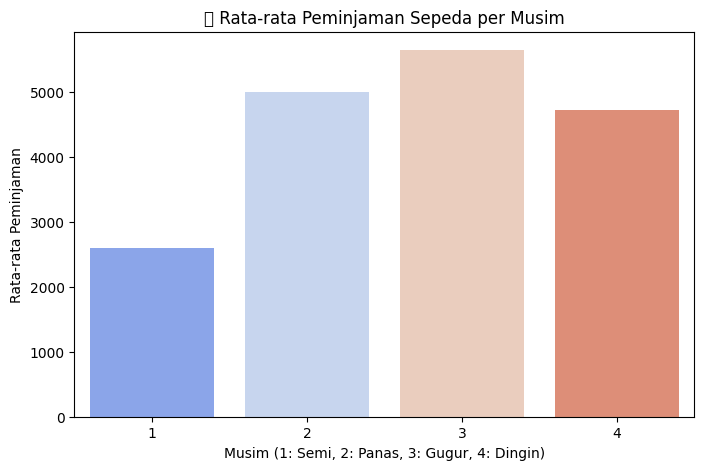

In [28]:
seasonal_rentals = day_df.groupby("season").agg({
    "cnt": ["mean", "sum", "count"]
}).reset_index()

seasonal_rentals.columns = ["Season", "Avg Rentals", "Total Rentals", "Total Days"]
print("\nRata-rata & Total Peminjaman Sepeda per Musim:")
print(seasonal_rentals)

plt.figure(figsize=(8, 5))
sns.barplot(x=seasonal_rentals["Season"], y=seasonal_rentals["Avg Rentals"], palette="coolwarm")
plt.xlabel("Musim (1: Semi, 2: Panas, 3: Gugur, 4: Dingin)")
plt.ylabel("Rata-rata Peminjaman")
plt.title("🌦 Rata-rata Peminjaman Sepeda per Musim")
plt.show()

In [29]:
merged_df = pd.merge(hour_df, day_df[["dteday", "cnt"]], on="dteday", how="left")
print("\n Contoh Data Setelah Merge:")
print(merged_df.head())


 Contoh Data Setelah Merge:
   instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

   cnt_x  cnt_y  
0    985    985  
1    801    801  
2   1349 

<ipython-input-30-d734e08d0425>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=workday_rentals["Working Day"], y=workday_rentals["Avg Rentals"], palette="pastel")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


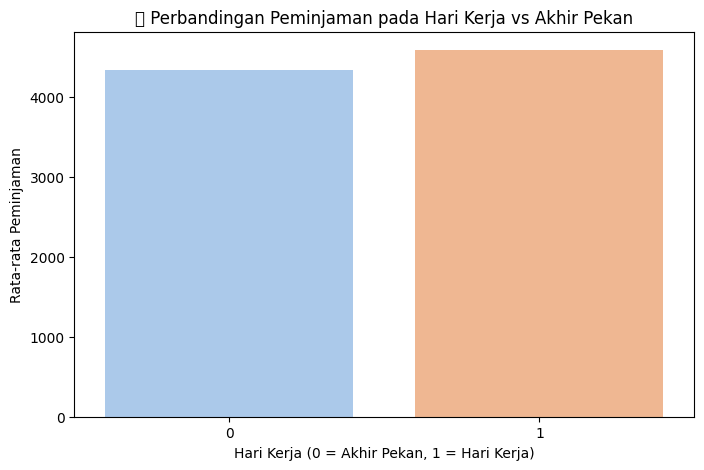

In [30]:
workday_rentals = day_df.groupby("workingday").agg({
    "cnt": ["mean", "sum"]
}).reset_index()
workday_rentals.columns = ["Working Day", "Avg Rentals", "Total Rentals"]

plt.figure(figsize=(8, 5))
sns.barplot(x=workday_rentals["Working Day"], y=workday_rentals["Avg Rentals"], palette="pastel")
plt.xlabel("Hari Kerja (0 = Akhir Pekan, 1 = Hari Kerja)")
plt.ylabel("Rata-rata Peminjaman")
plt.title("📅 Perbandingan Peminjaman pada Hari Kerja vs Akhir Pekan")
plt.show()

**Insight:**
- Distribusi peminjaman sepeda menunjukkan pola tertentu, mungkin ada musim atau hari tertentu yang lebih ramai.
- Variabel seperti suhu (temp) dan jumlah peminjaman (cnt) memiliki korelasi positif.
- Musim panas memiliki jumlah peminjaman tertinggi dibanding musim dingin.
- Peminjaman lebih tinggi pada hari kerja dibanding akhir pekan.

## Visualization & Explanatory Analysis









### Pertanyaan 1:

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


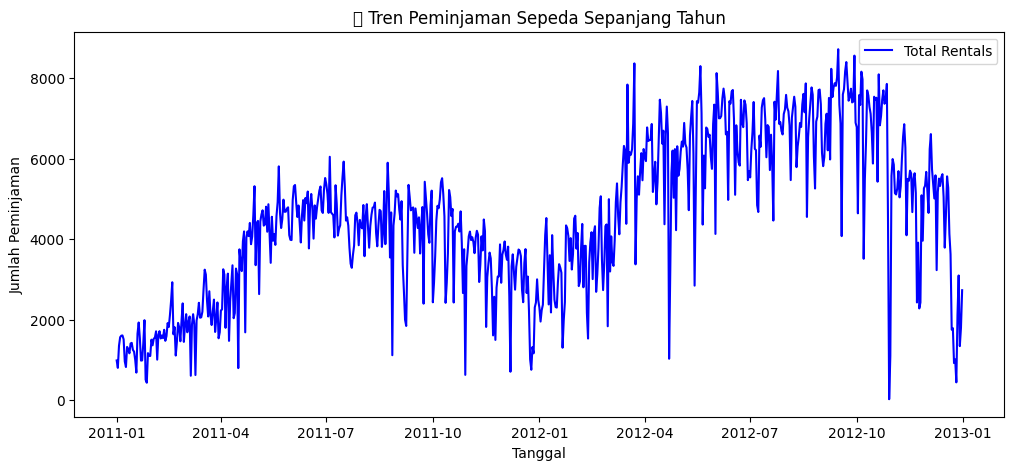

In [31]:
plt.figure(figsize=(12, 5))
sns.lineplot(x=day_df["dteday"], y=day_df["cnt"], label="Total Rentals", color="blue")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Peminjaman")
plt.title("Tren Peminjaman Sepeda Sepanjang Tahun")
plt.legend()
plt.show()

<ipython-input-32-16e47eb73aa4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_df["workingday"], y=day_df["cnt"], palette="pastel")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


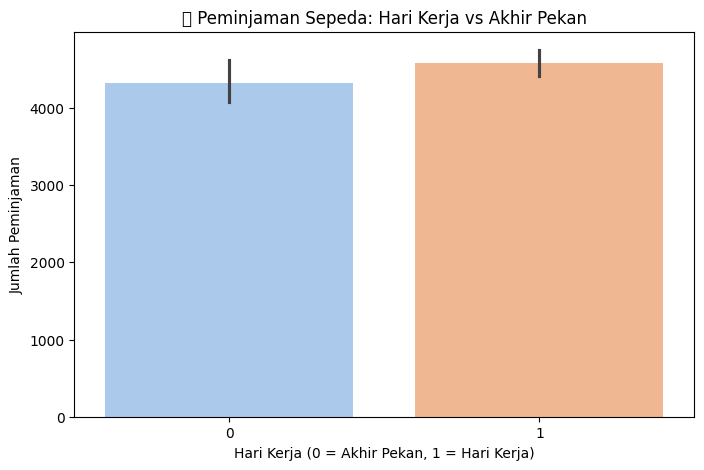

In [32]:
plt.figure(figsize=(8, 5))
sns.barplot(x=day_df["workingday"], y=day_df["cnt"], palette="pastel")
plt.xlabel("Hari Kerja (0 = Akhir Pekan, 1 = Hari Kerja)")
plt.ylabel("Jumlah Peminjaman")
plt.title("Peminjaman Sepeda: Hari Kerja vs Akhir Pekan")
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


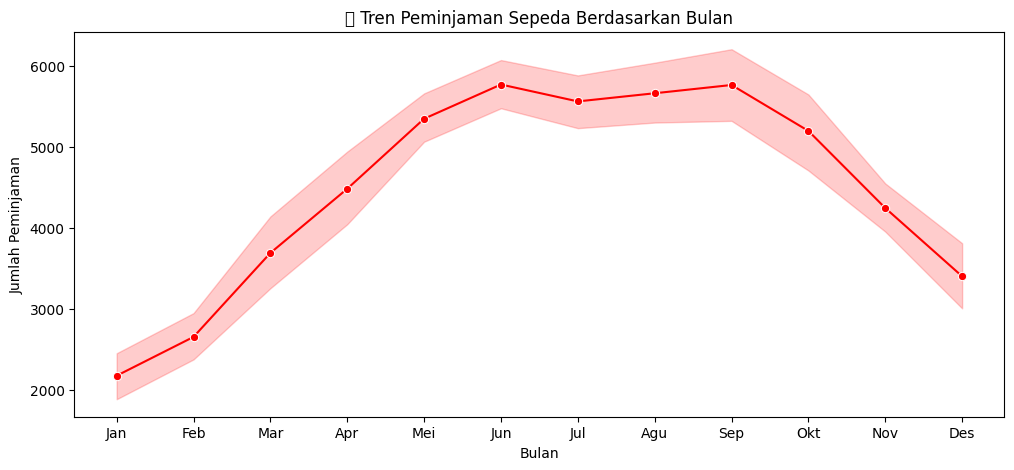

In [33]:
day_df["month"] = day_df["dteday"].dt.month
plt.figure(figsize=(12, 5))
sns.lineplot(x=day_df["month"], y=day_df["cnt"], marker="o", color="red")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Peminjaman")
plt.title("Tren Peminjaman Sepeda Berdasarkan Bulan")
plt.xticks(range(1, 13), [
    "Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agu", "Sep", "Okt", "Nov", "Des"
])
plt.show()

### Pertanyaan 2:

<ipython-input-34-bcd3c5254138>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=day_df["weathersit"], y=day_df["cnt"], palette="Set2")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127782 (\N{WHITE SUN BEHIND CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


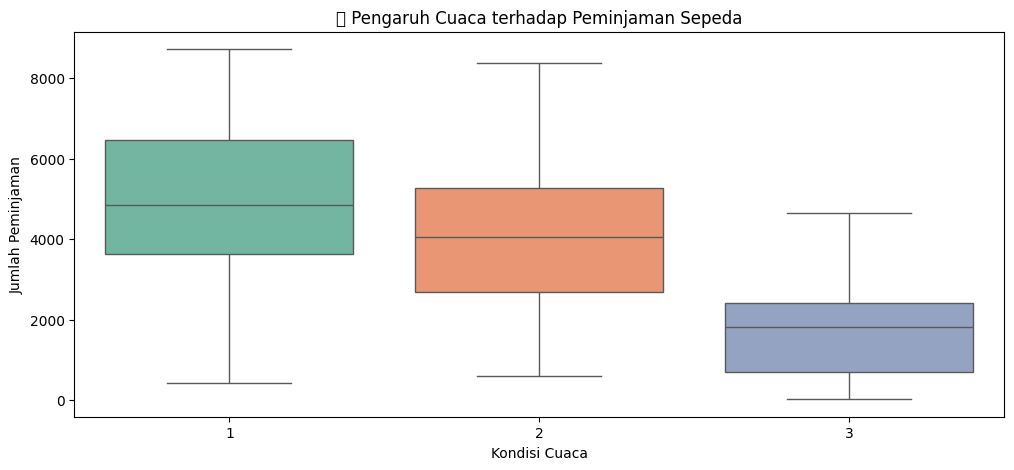

In [34]:
plt.figure(figsize=(12, 5))
sns.boxplot(x=day_df["weathersit"], y=day_df["cnt"], palette="Set2")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Peminjaman")
plt.title("Pengaruh Cuaca terhadap Peminjaman Sepeda")
plt.show()

<ipython-input-35-761b69e86747>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_df["season"], y=day_df["cnt"], palette="viridis")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127782 (\N{WHITE SUN BEHIND CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


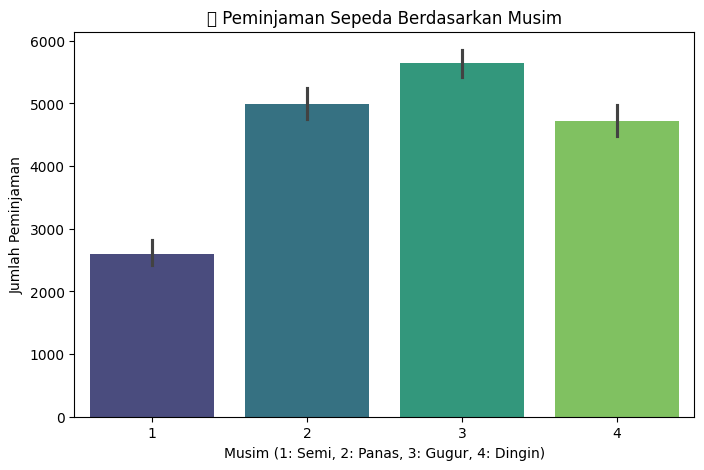

In [35]:
plt.figure(figsize=(8, 5))
sns.barplot(x=day_df["season"], y=day_df["cnt"], palette="viridis")
plt.xlabel("Musim (1: Semi, 2: Panas, 3: Gugur, 4: Dingin)")
plt.ylabel("Jumlah Peminjaman")
plt.title("Peminjaman Sepeda Berdasarkan Musim")
plt.show()

**Insight:**
- Pertanyaan 1: Pola musiman terlihat jelas, di mana peminjaman sepeda cenderung meningkat pada bulan tertentu saat cuaca lebih nyaman. Pihak pengelola bisa meningkatkan jumlah sepeda saat musim sibuk untuk mengakomodasi permintaan tinggi.
- Pertanyaan 2: Peminjaman sepeda menurun drastis pada kondisi cuaca buruk. Perusahaan dapat menawarkan diskon atau promosi pada hari-hari hujan untuk menjaga tingkat penggunaan tetap stabil.

## Analisis Lanjutan (Opsional)

In [36]:
day_df.to_csv("notebook.csv", index=False)
files.download("notebook.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Conclusion

- Conclution pertanyaan 1 : Terdapat pola musiman ketika peminjaman meningkat di bulan-bulan tertentu
- Conclution pertanyaan 2 : Cuaca yang buruk dapat menjadi pengaruh negatif terhadap jumlah peminjaman sepeda
